In [1]:
import os
import pandas as pd

data_dir = "round-5-island-data-bottle"
df_dict = {}

for filename in os.listdir(data_dir):
    print(f"Reading {filename}...")
    df_dict[filename] = pd.read_csv(os.path.join(data_dir, filename), delimiter=";")

Reading trades_round_1_day_-1_wn.csv...
Reading trades_round_1_day_-2_wn.csv...
Reading trades_round_1_day_0_wn.csv...
Reading trades_round_3_day_0_wn.csv...
Reading trades_round_3_day_1_wn.csv...
Reading trades_round_3_day_2_wn.csv...
Reading trades_round_4_day_1_wn.csv...
Reading trades_round_4_day_2_wn.csv...
Reading trades_round_4_day_3_wn.csv...


Buyers: ['Vinnie' 'Remy' 'Ruby' 'Rhianna' 'Valentina' 'Vladimir' 'Adam' 'Amelia']
Sellers: ['Ruby' 'Valentina' 'Remy' 'Vinnie' 'Vladimir' 'Rhianna' 'Amelia' 'Adam']


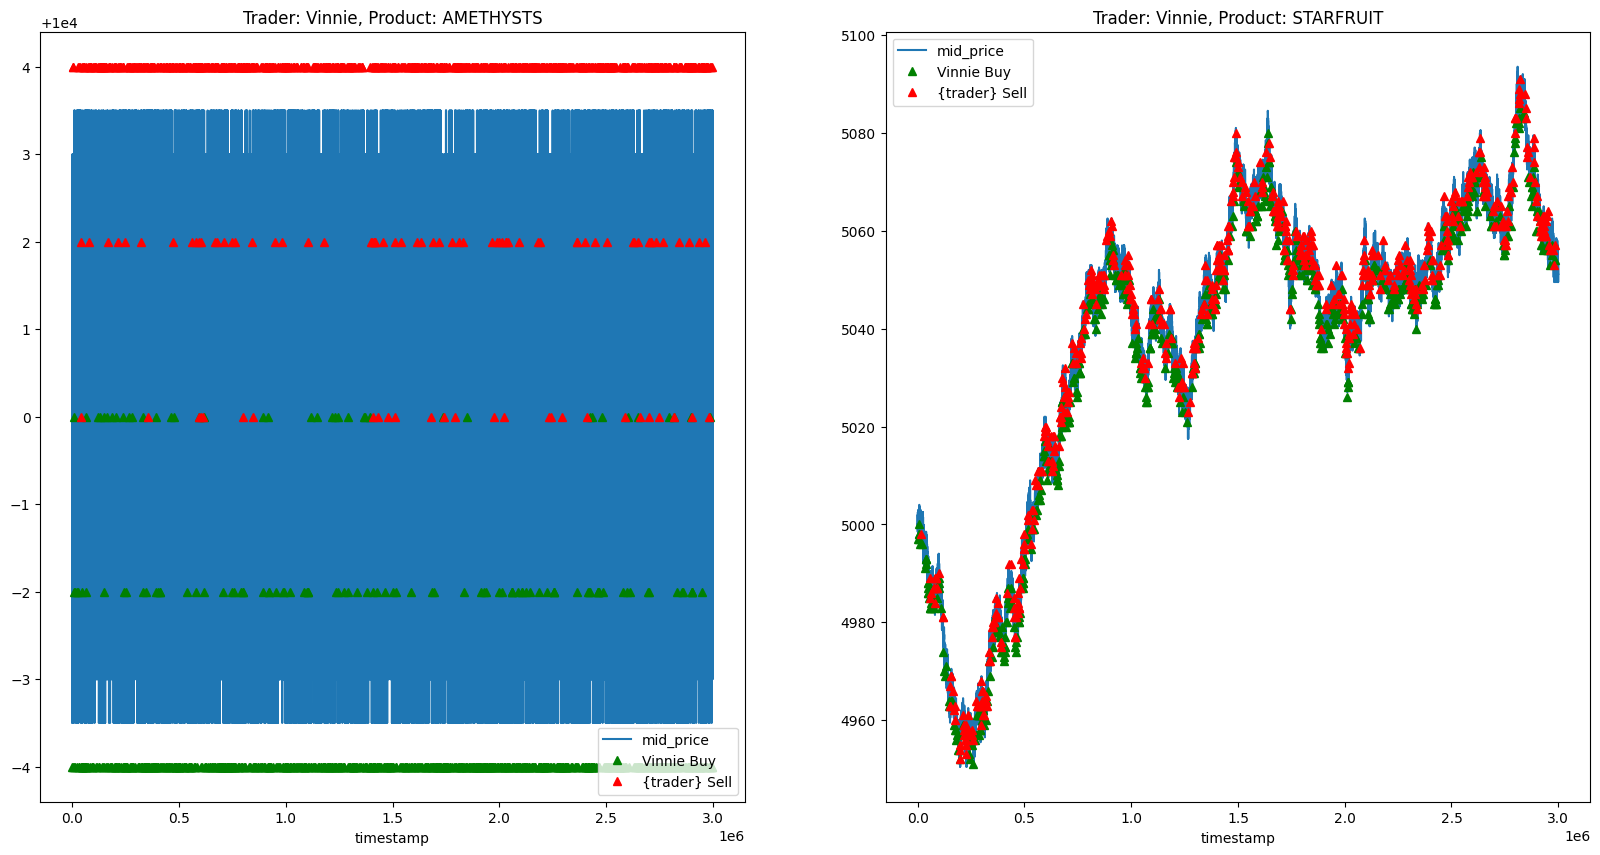

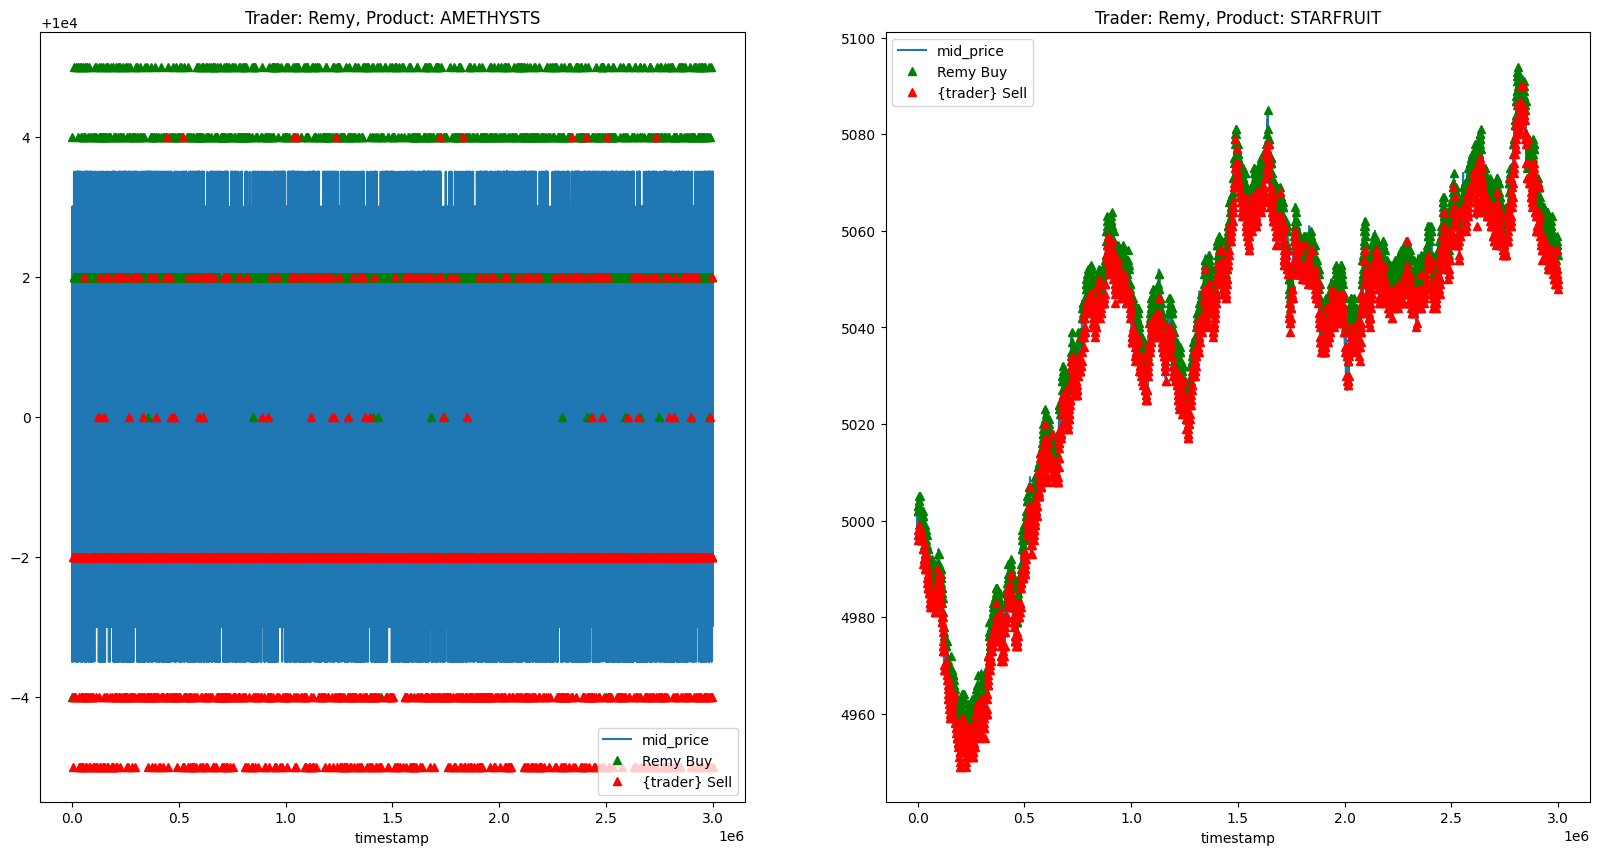

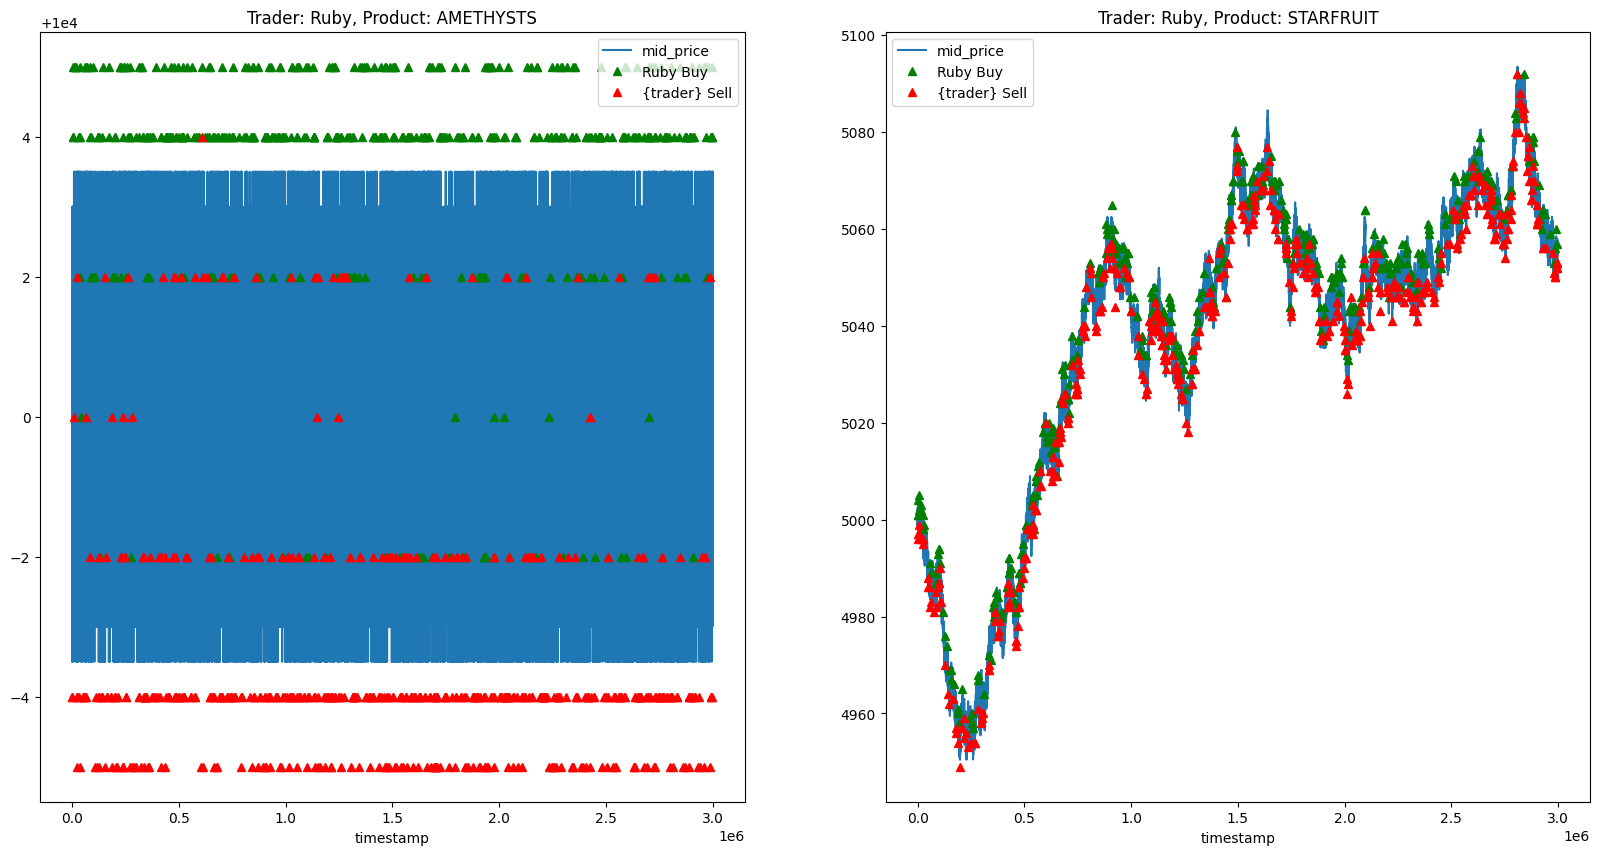

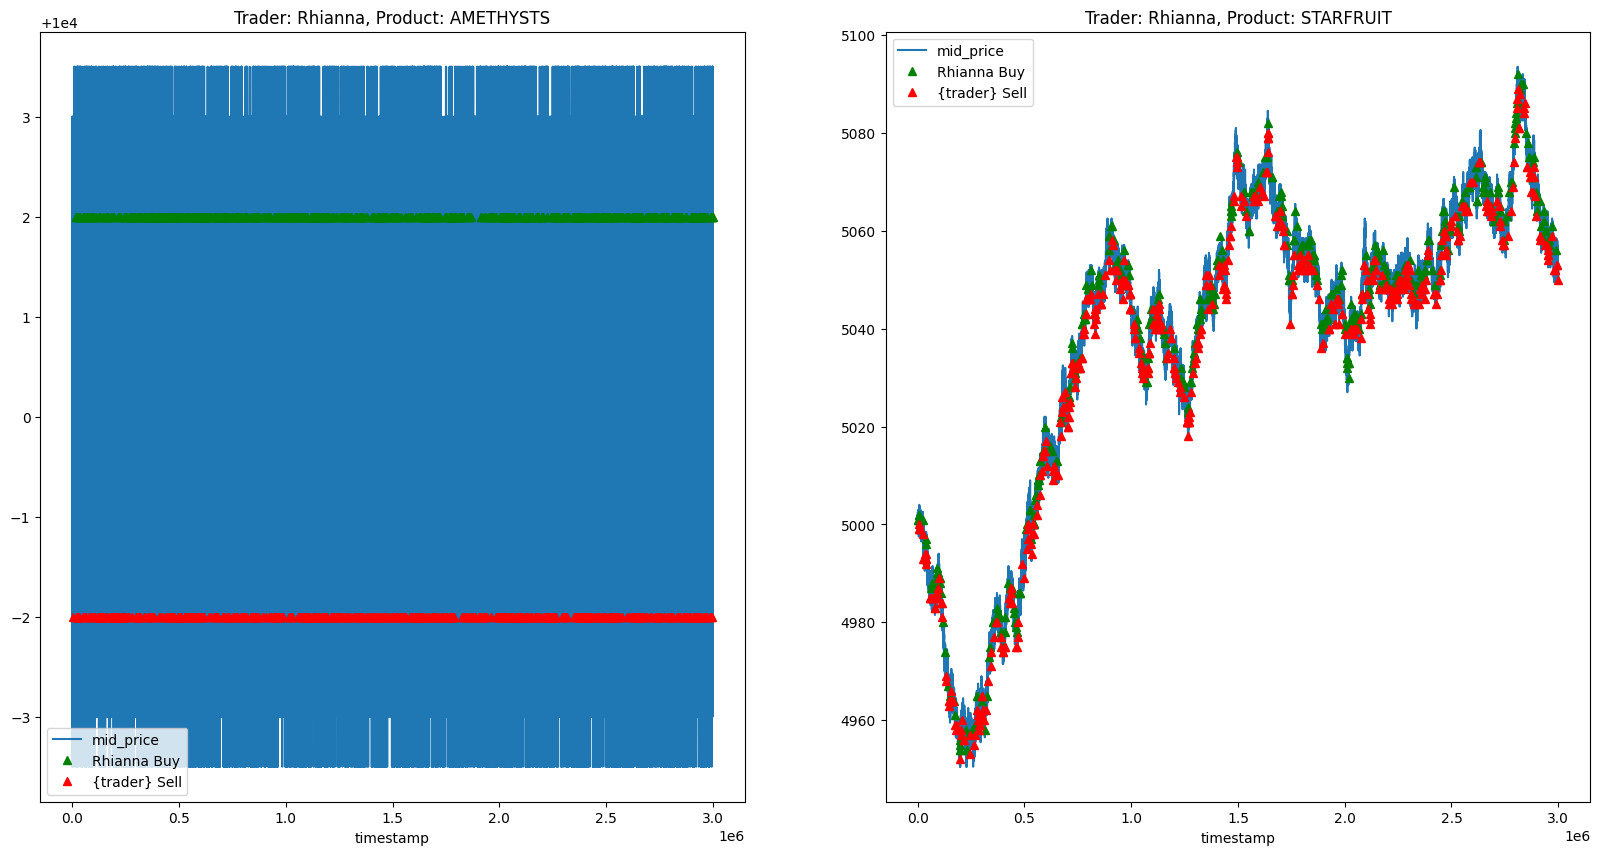

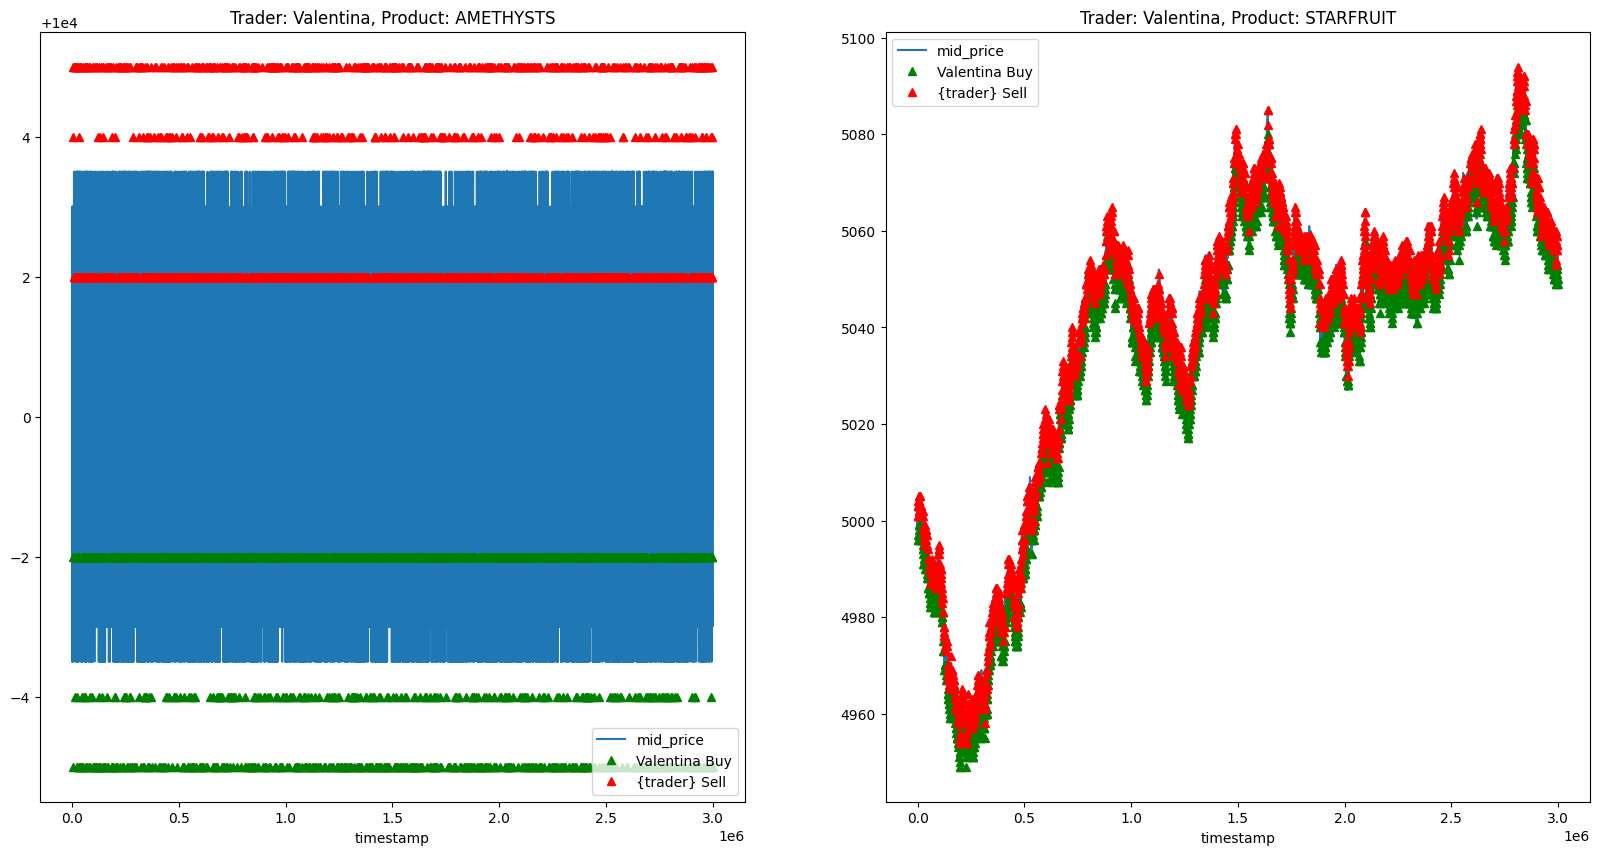

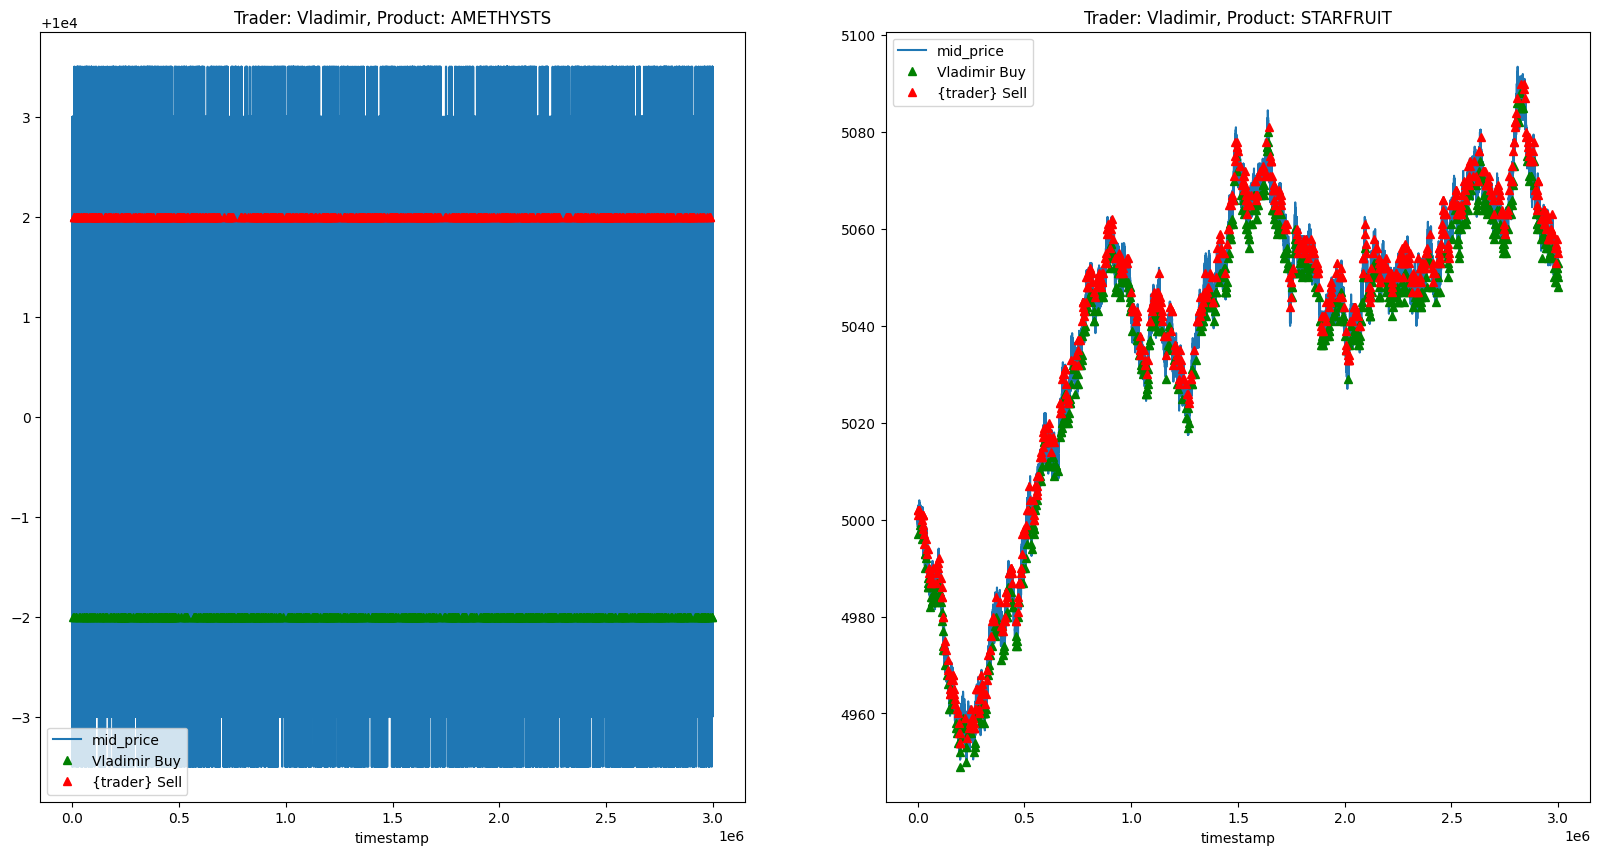

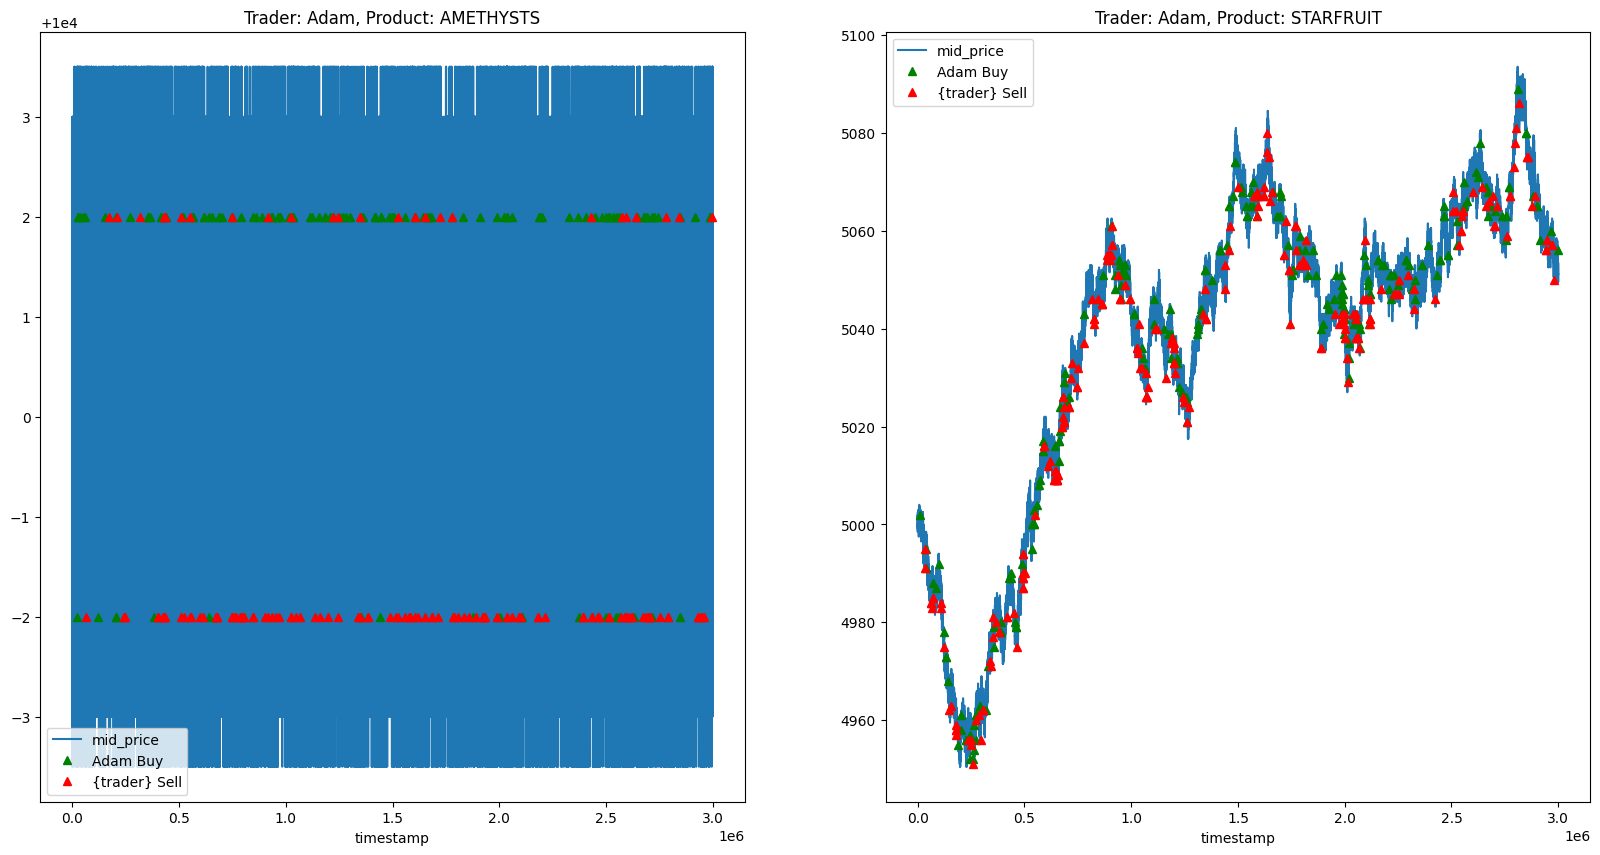

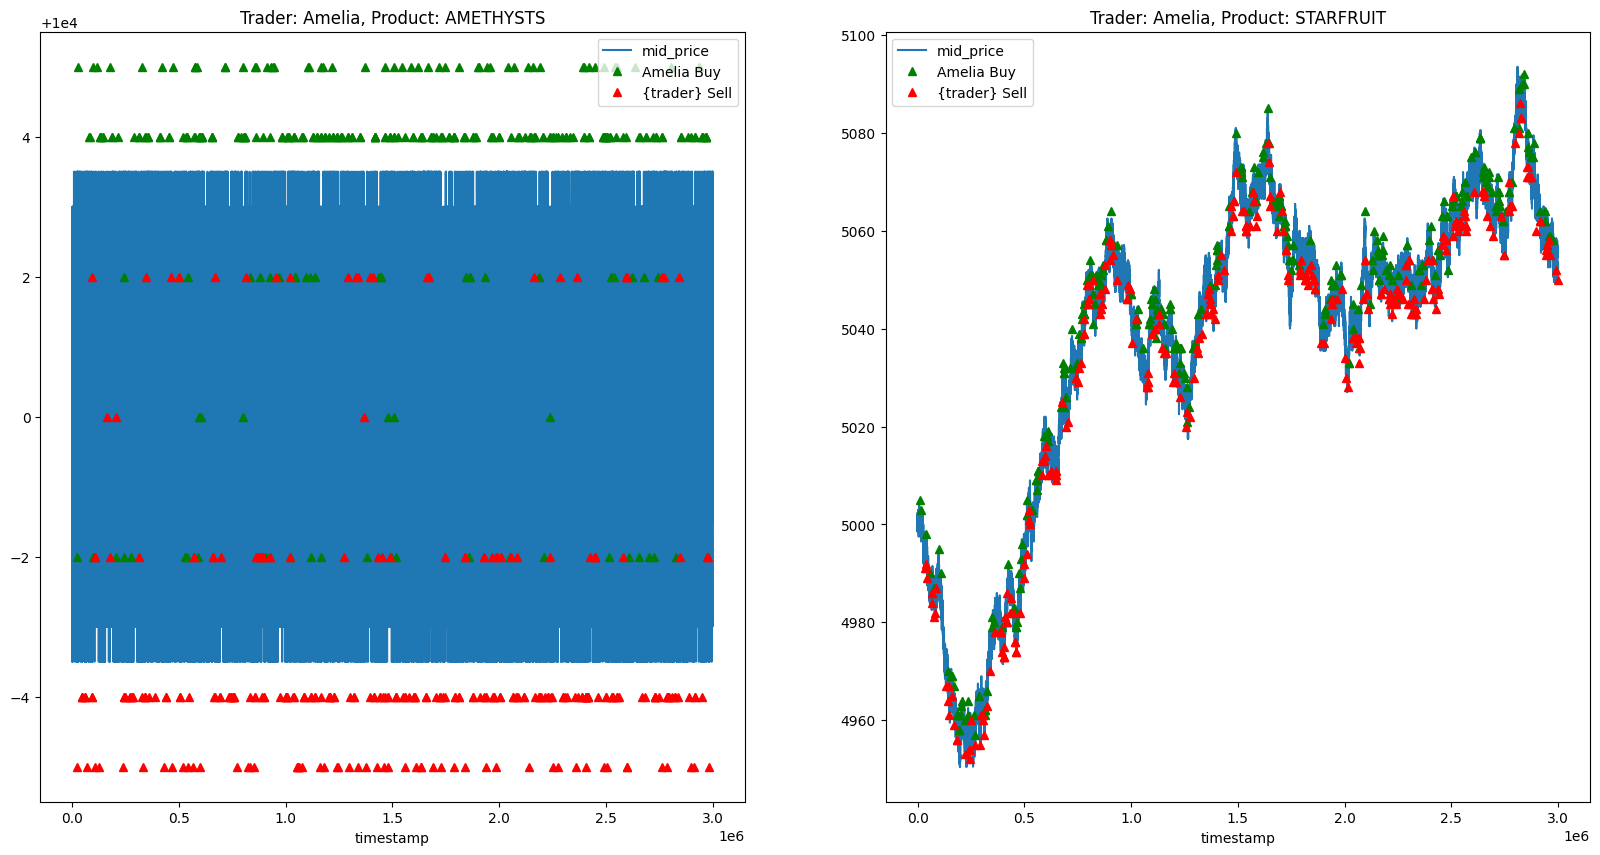

In [2]:
import matplotlib.pyplot as plt

filenames = ["trades_round_1_day_-2_wn.csv", "trades_round_1_day_-1_wn.csv", "trades_round_1_day_0_wn.csv"]
price_filenames = ["prices_round_1_day_-2.csv", "prices_round_1_day_-1.csv", "prices_round_1_day_0.csv"]
total_df, total_price_df = [], []

for idx, filename in enumerate(filenames):
    cur_df = df_dict[filename]
    cur_df["timestamp"] = cur_df["timestamp"] + idx * 1000000
    total_df.append(cur_df)
    
    price_df = pd.read_csv(os.path.join("round-1-island-data-bottle", price_filenames[idx]), delimiter=";")
    price_df["timestamp"] = price_df["timestamp"] + idx * 1000000
    total_price_df.append(price_df)
    
total_df = pd.concat(total_df)
total_price_df = pd.concat(total_price_df)
# print(total_df)

print(f"Buyers: {total_df["buyer"].unique()}")
print(f"Sellers: {total_df["seller"].unique()}")

traders = list(total_df["buyer"].unique())

for i, trader in enumerate(traders):
    figs, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    
    for j, product in enumerate(["AMETHYSTS", "STARFRUIT"]):
        price_df = total_price_df[total_price_df["product"] == product].set_index("timestamp")
        buy_df = total_df[(total_df["buyer"] == trader) & (total_df["symbol"] == product)].set_index("timestamp")
        sell_df = total_df[(total_df["seller"] == trader) & (total_df["symbol"] == product)].set_index("timestamp")

        price_series = price_df["mid_price"]
        buy_series = buy_df["price"]
        sell_series = sell_df["price"]

        price_series.plot(ax=axes[j])
        buy_series.plot(ax=axes[j], color="green", marker="^", linestyle="None")
        sell_series.plot(ax=axes[j], color="red", marker="^", linestyle="None")
        axes[j].legend(["mid_price", f"{trader} Buy", f"{trader} Sell"])
        axes[j].set_title(f"Trader: {trader}, Product: {product}")

Buyers: ['Remy' 'Vinnie' 'Ruby' 'Rhianna' 'Vladimir']
Sellers: ['Vinnie' 'Rhianna' 'Remy' 'Vladimir' 'Ruby']


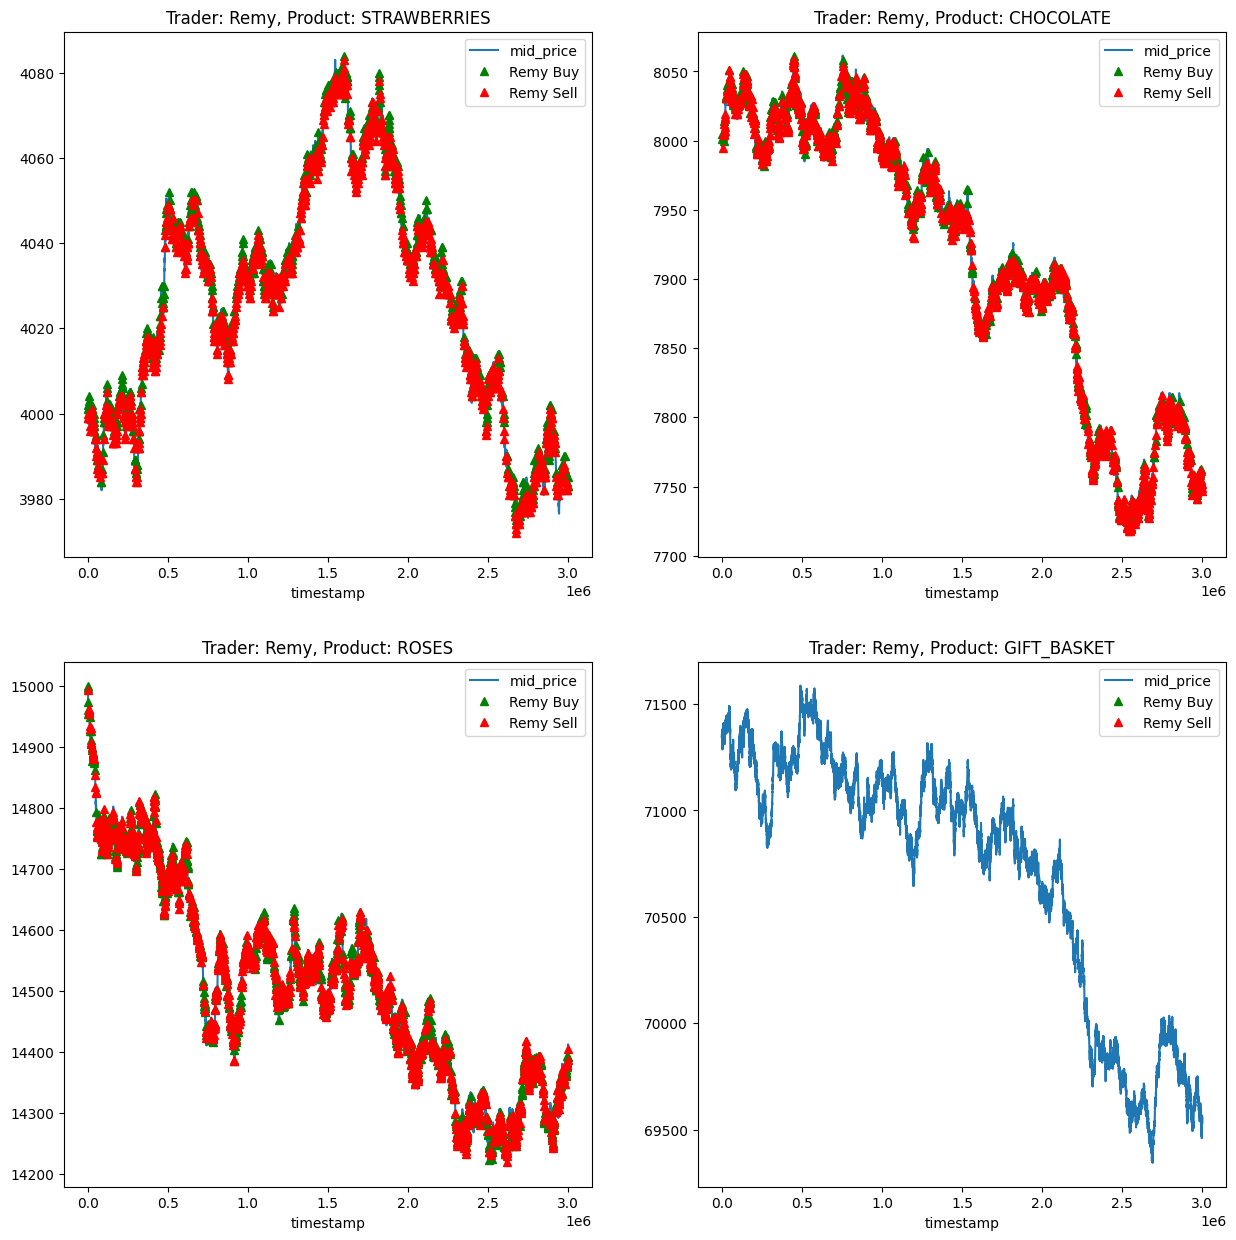

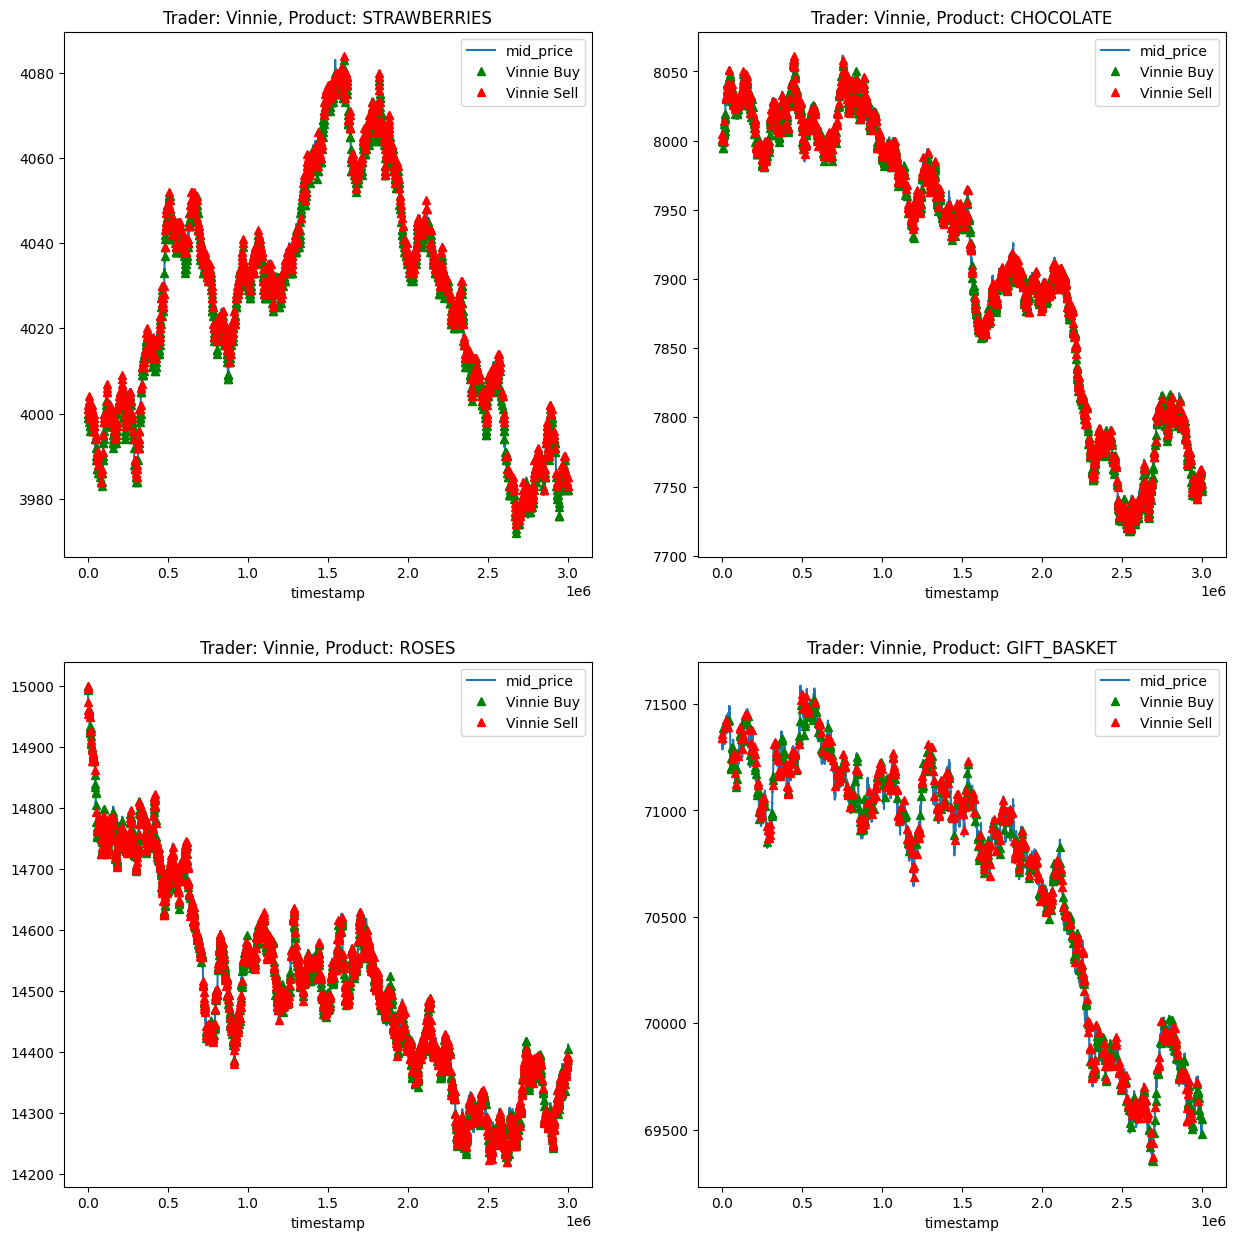

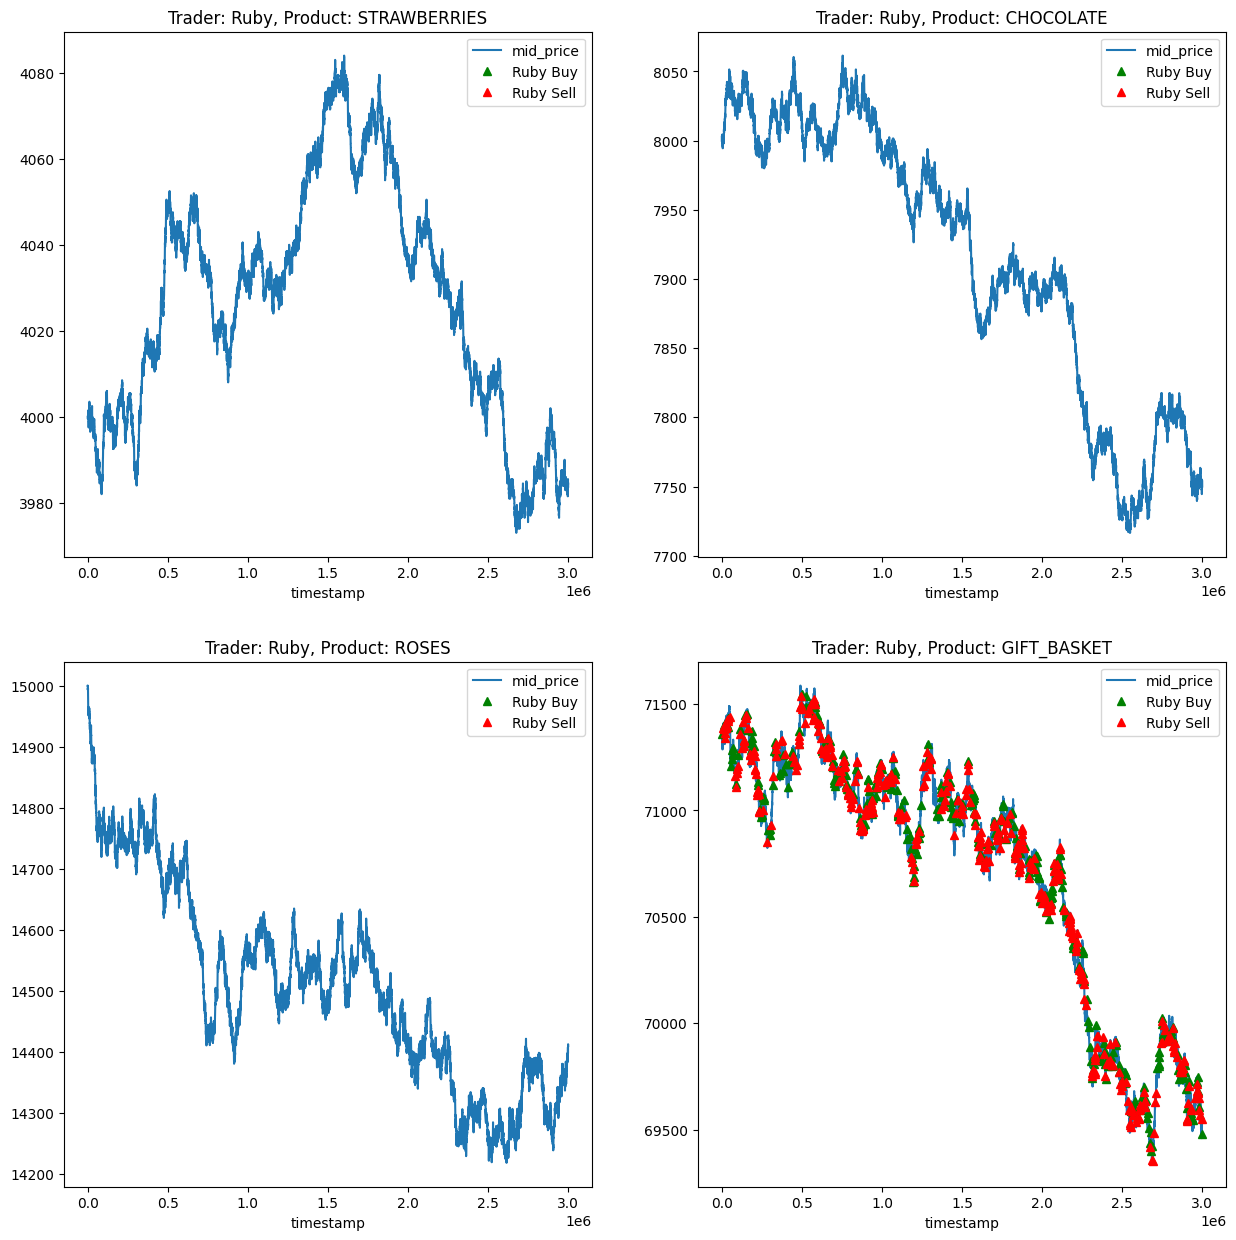

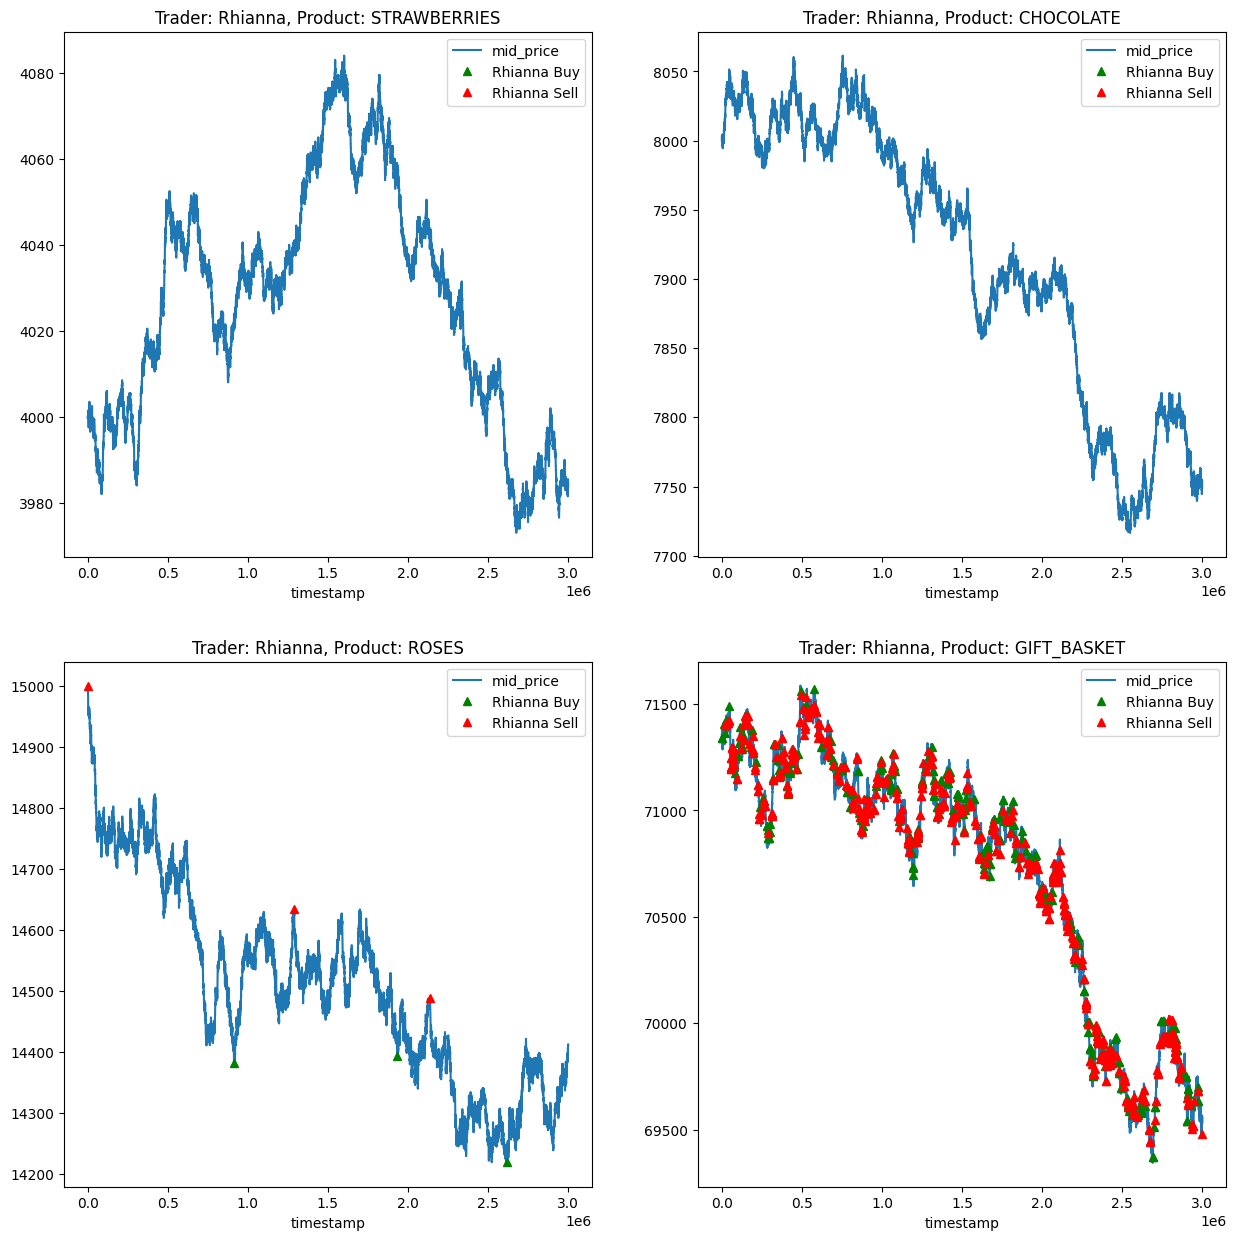

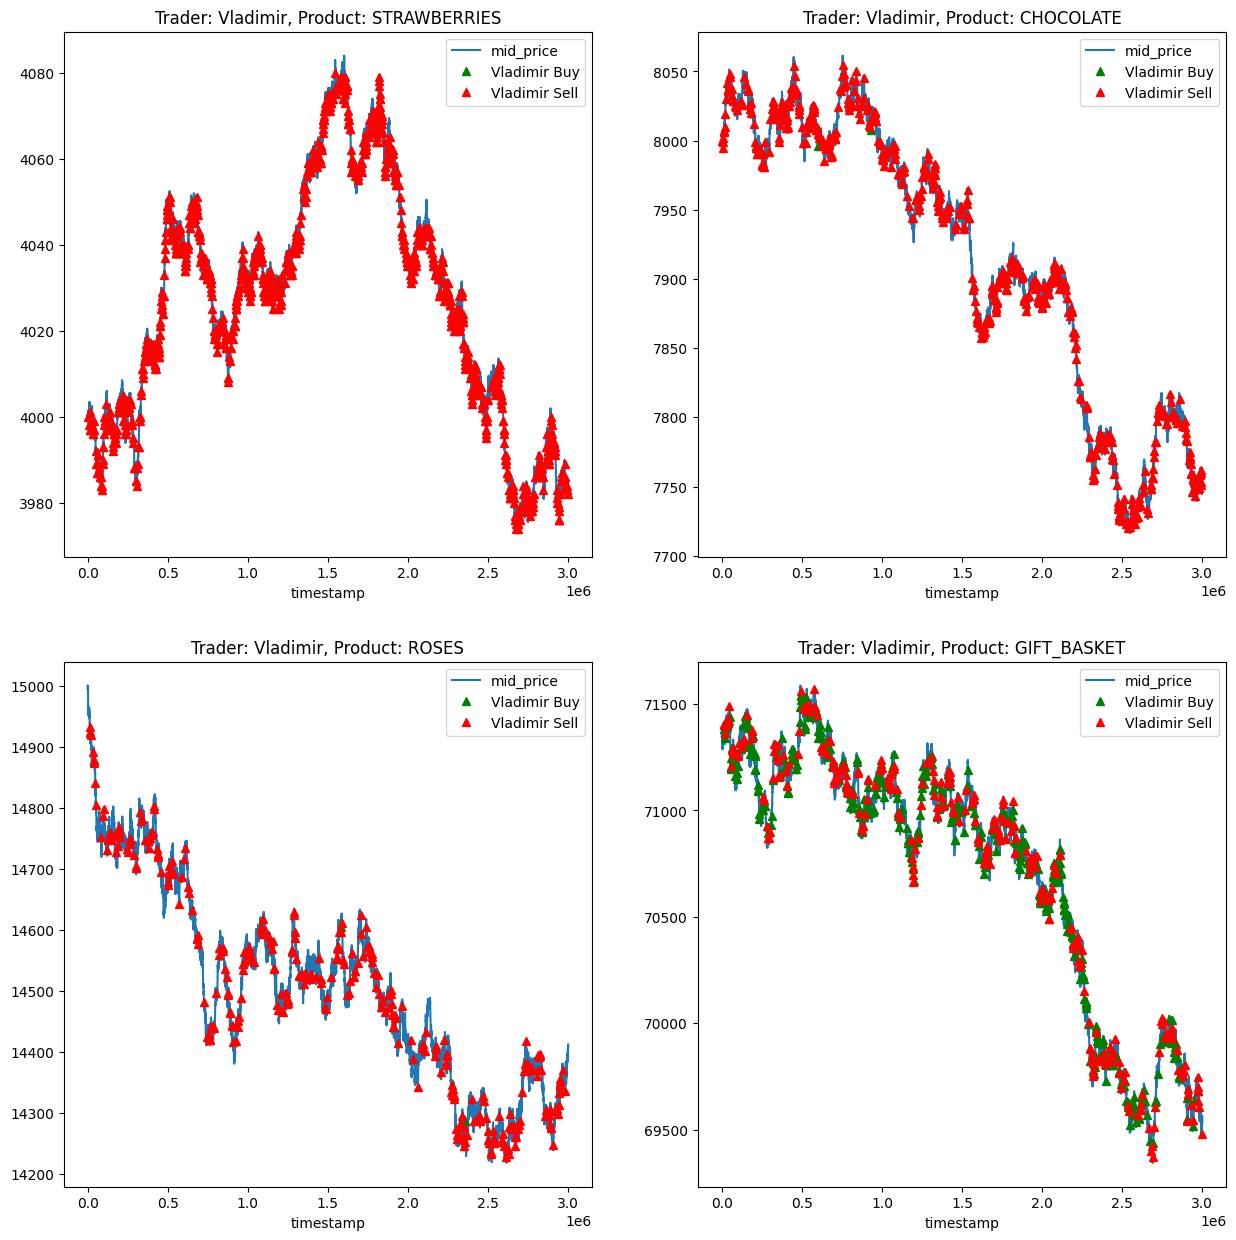

In [3]:
filenames = ["trades_round_3_day_0_wn.csv", "trades_round_3_day_1_wn.csv", "trades_round_3_day_2_wn.csv"]
price_filenames = ["prices_round_3_day_0.csv", "prices_round_3_day_1.csv", "prices_round_3_day_2.csv"]
total_df, total_price_df = [], []

for idx, filename in enumerate(filenames):
    cur_df = df_dict[filename]
    cur_df["timestamp"] = cur_df["timestamp"] + idx * 1000000
    total_df.append(cur_df)
    
    price_df = pd.read_csv(os.path.join("round-3-island-data-bottle", price_filenames[idx]), delimiter=";")
    price_df["timestamp"] = price_df["timestamp"] + idx * 1000000
    total_price_df.append(price_df)
    
total_df = pd.concat(total_df)
total_price_df = pd.concat(total_price_df)
# print(total_df)

print(f"Buyers: {total_df["buyer"].unique()}")
print(f"Sellers: {total_df["seller"].unique()}")

traders = list(total_df["buyer"].unique())

for i, trader in enumerate(traders):
    figs, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
    
    for j, product in enumerate(["STRAWBERRIES", "CHOCOLATE", "ROSES", "GIFT_BASKET"]):
        price_df = total_price_df[total_price_df["product"] == product].set_index("timestamp")
        buy_df = total_df[(total_df["buyer"] == trader) & (total_df["symbol"] == product)].set_index("timestamp")
        sell_df = total_df[(total_df["seller"] == trader) & (total_df["symbol"] == product)].set_index("timestamp")

        price_series = price_df["mid_price"]
        buy_series = buy_df["price"]
        sell_series = sell_df["price"]

        price_series.plot(ax=axes[j // 2, j % 2])
        buy_series.plot(ax=axes[j // 2, j % 2], color="green", marker="^", linestyle="None")
        sell_series.plot(ax=axes[j // 2, j % 2], color="red", marker="^", linestyle="None")
        axes[j // 2, j % 2].legend(["mid_price", f"{trader} Buy", f"{trader} Sell"])
        axes[j // 2, j % 2].set_title(f"Trader: {trader}, Product: {product}")

Buyers: ['Valentina' 'Vinnie' 'Vladimir' 'Ruby' 'Raj' 'Rhianna']
Sellers: ['Valentina' 'Vinnie' 'Ruby' 'Rhianna' 'Raj' 'Vladimir']


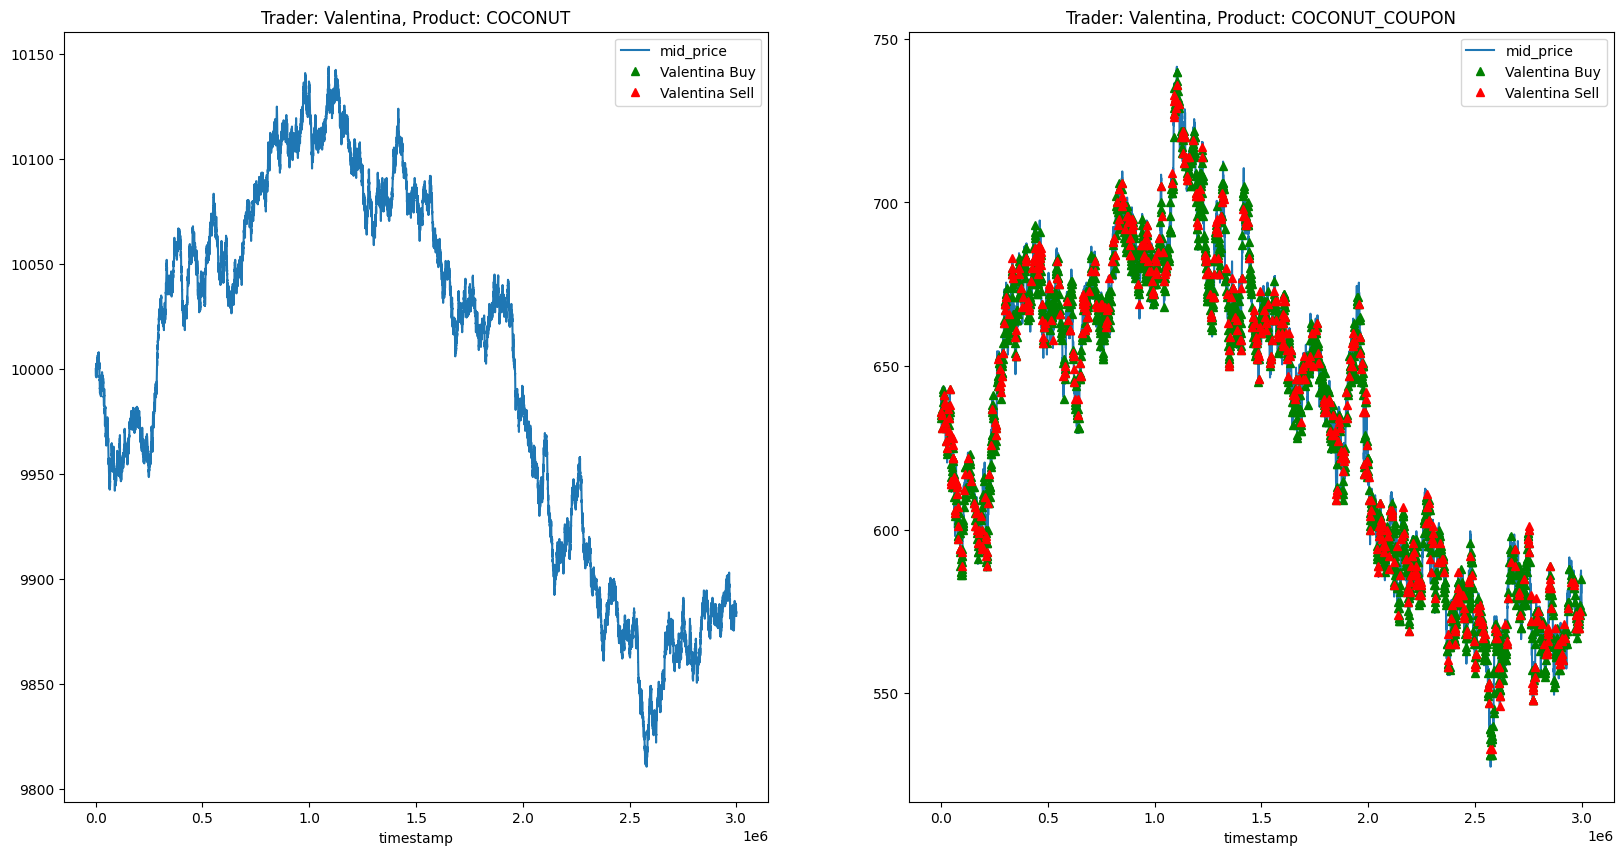

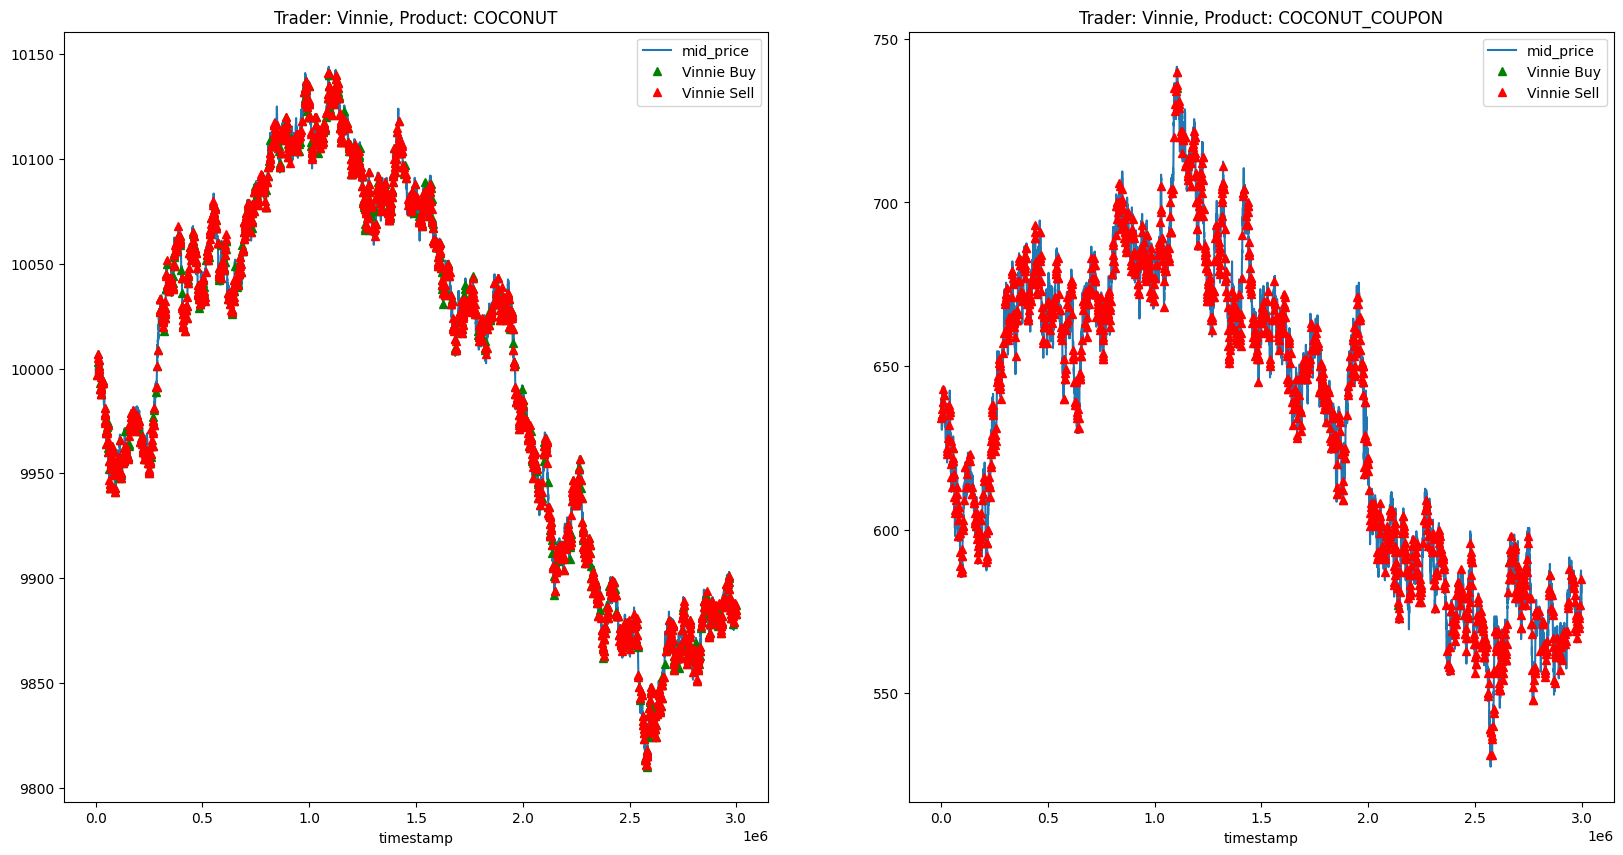

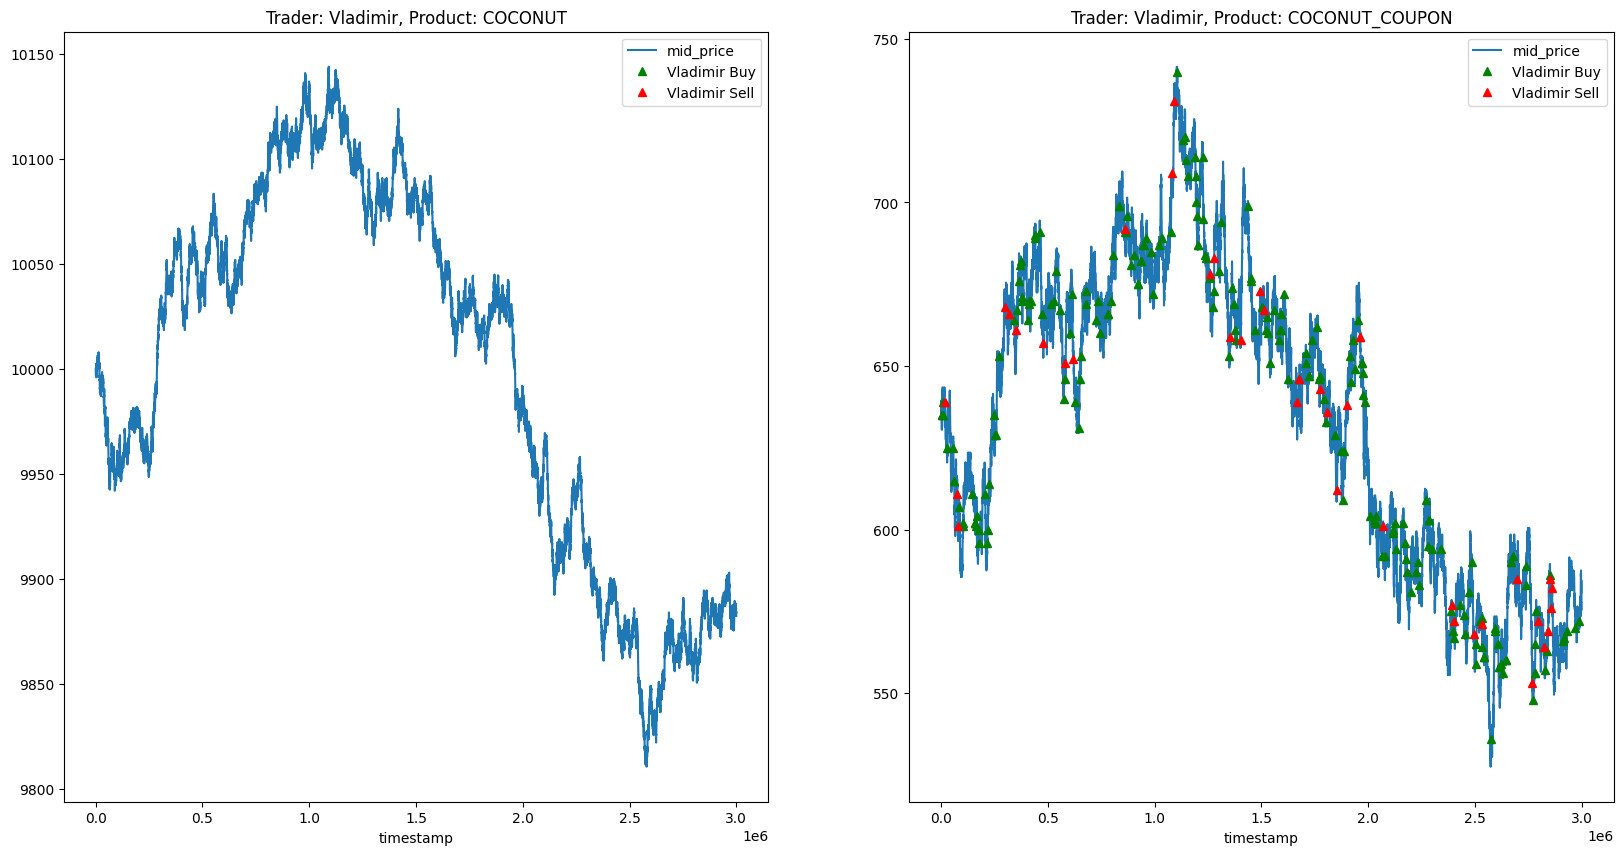

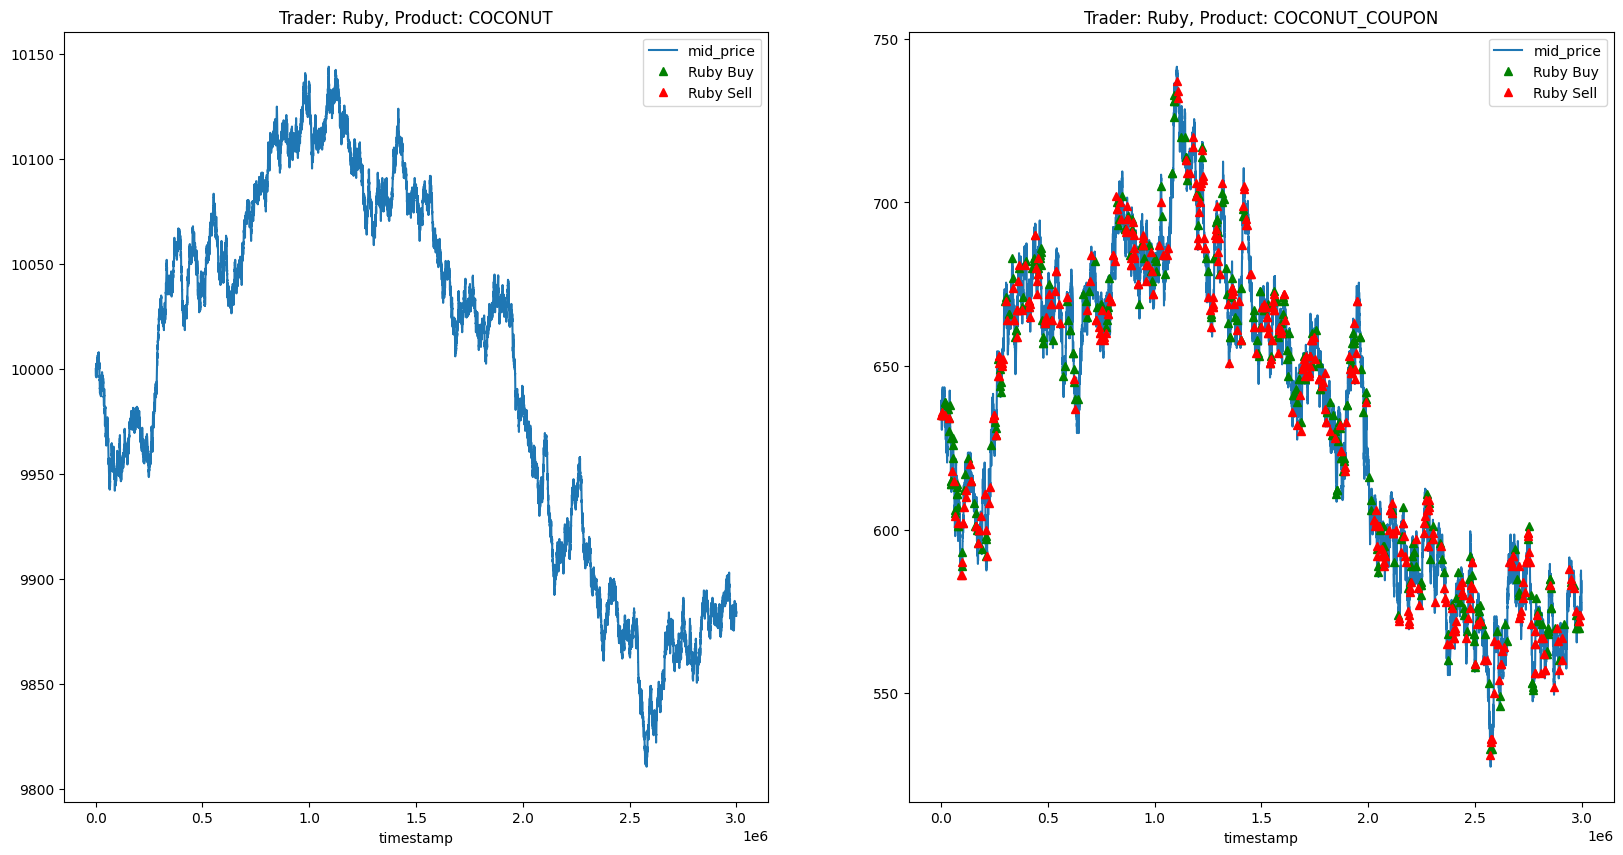

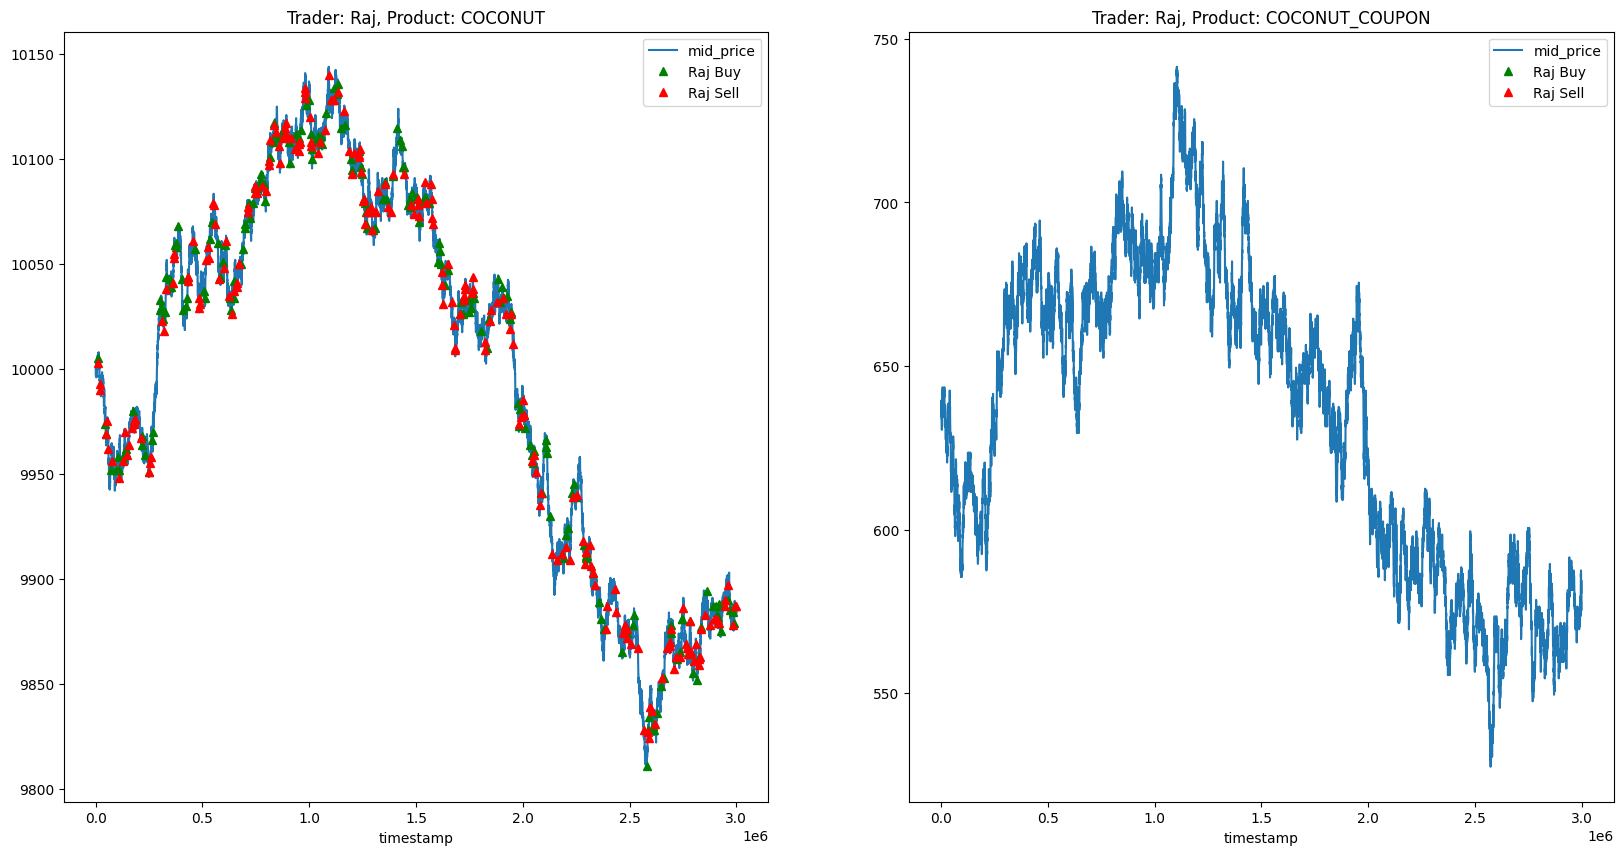

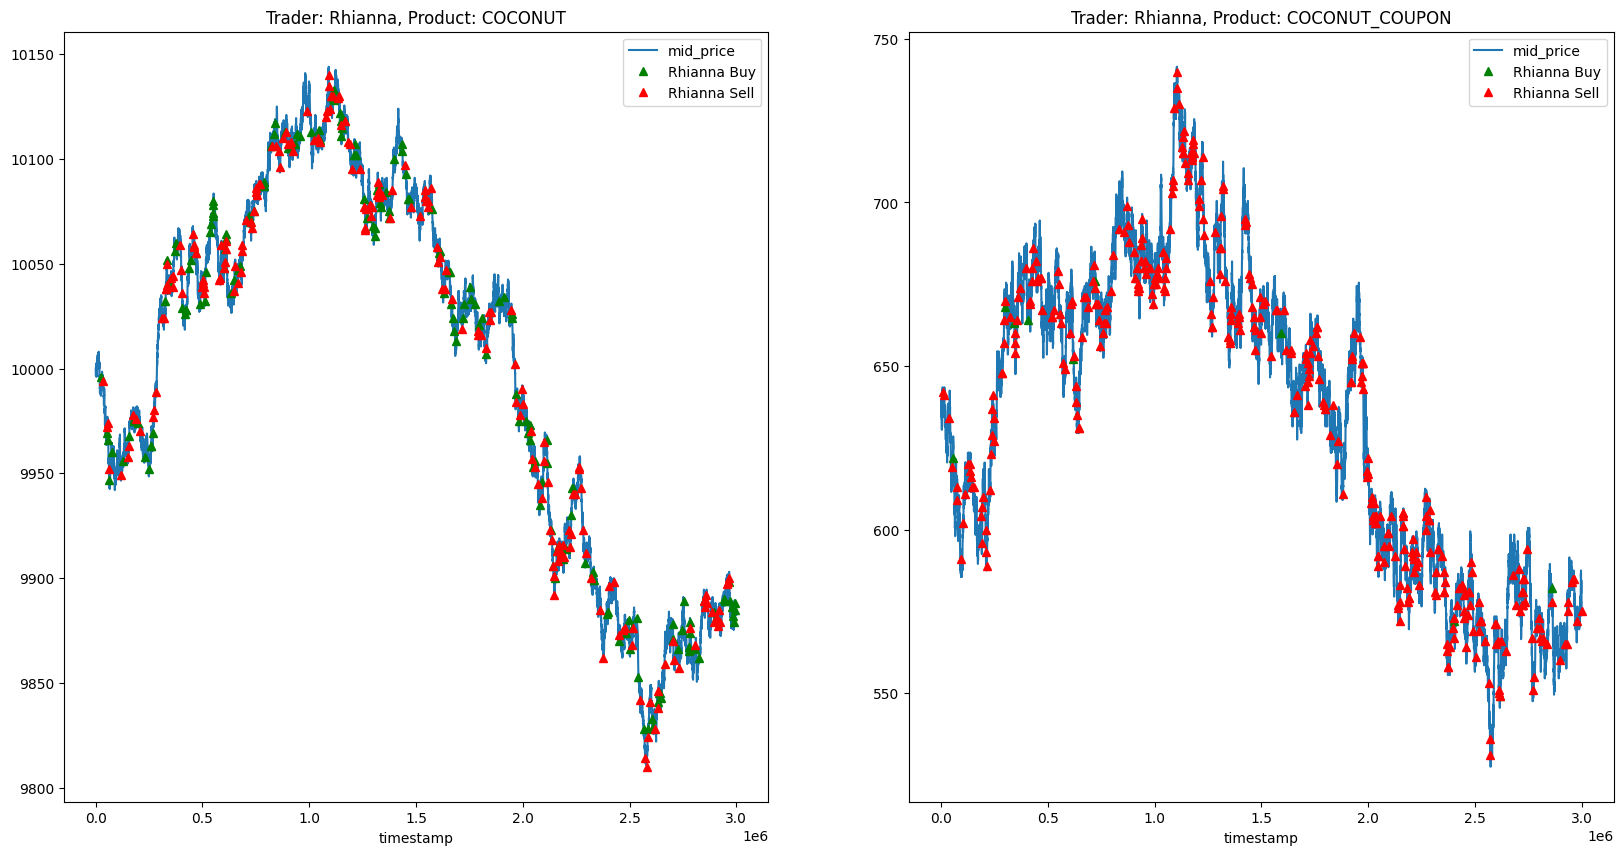

In [4]:
filenames = ["trades_round_4_day_1_wn.csv", "trades_round_4_day_2_wn.csv", "trades_round_4_day_3_wn.csv"]
price_filenames = ["prices_round_4_day_1.csv", "prices_round_4_day_2.csv", "prices_round_4_day_3.csv"]
total_df, total_price_df = [], []

for idx, filename in enumerate(filenames):
    cur_df = df_dict[filename]
    cur_df["timestamp"] = cur_df["timestamp"] + idx * 1000000
    total_df.append(cur_df)
    
    price_df = pd.read_csv(os.path.join("round-4-island-data-bottle", price_filenames[idx]), delimiter=";")
    price_df["timestamp"] = price_df["timestamp"] + idx * 1000000
    total_price_df.append(price_df)
    
total_df = pd.concat(total_df)
total_price_df = pd.concat(total_price_df)
# print(total_df)

print(f"Buyers: {total_df["buyer"].unique()}")
print(f"Sellers: {total_df["seller"].unique()}")

traders = list(total_df["buyer"].unique())

for i, trader in enumerate(traders):
    figs, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    
    for j, product in enumerate(["COCONUT", "COCONUT_COUPON"]):
        price_df = total_price_df[total_price_df["product"] == product].set_index("timestamp")
        buy_df = total_df[(total_df["buyer"] == trader) & (total_df["symbol"] == product)].set_index("timestamp")
        sell_df = total_df[(total_df["seller"] == trader) & (total_df["symbol"] == product)].set_index("timestamp")

        price_series = price_df["mid_price"]
        buy_series = buy_df["price"]
        sell_series = sell_df["price"]

        price_series.plot(ax=axes[j])
        buy_series.plot(ax=axes[j], color="green", marker="^", linestyle="None")
        sell_series.plot(ax=axes[j], color="red", marker="^", linestyle="None")
        axes[j].legend(["mid_price", f"{trader} Buy", f"{trader} Sell"])
        axes[j].set_title(f"Trader: {trader}, Product: {product}")